In [3]:
# import libraries and data
import pandas as pd
import statsmodels
import numpy as np
import matplotlib.pyplot as plt


pit_stops = pd.read_csv('pit_stops.csv', encoding="utf-8")
results = pd.read_csv('results.csv', encoding="utf-8")

pit_stops.head()

,raceId,driverId,stop,lap,time,duration,milliseconds
0,841,153,1,1,17:05:23,26.898,26898
1,841,30,1,1,17:05:52,25.021,25021
2,841,17,1,11,17:20:48,23.426,23426
3,841,4,1,12,17:22:34,23.251,23251
4,841,13,1,13,17:24:10,23.842,23842


In [4]:
results.head(10)

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1
5,6,18,6,3,8,13,6,6,6,3.0,57,\N,\N,50,14,1:29.639,212.974,11
6,7,18,7,5,14,17,7,7,7,2.0,55,\N,\N,22,12,1:29.534,213.224,5
7,8,18,8,6,1,15,8,8,8,1.0,53,\N,\N,20,4,1:27.903,217.180,5
8,9,18,9,2,4,2,\N,R,9,0.0,47,\N,\N,15,9,1:28.753,215.100,4
9,10,18,10,7,12,18,\N,R,10,0.0,43,\N,\N,23,13,1:29.558,213.166,3


In [5]:
# rename milliseconds to pit_delta and race_time to avoid confusion
pit_stops.rename(columns = {'milliseconds': 'pit_delta'}, inplace = True)
results.rename(columns = {'milliseconds': 'race_time'}, inplace = True)
pit_merge = pd.merge(pit_stops, results, on=['raceId', 'driverId'])
pit_merged = pit_merge[pit_merge['statusId'] == 1] # filters out only finished races
pit_merged.head(20)


,raceId,driverId,stop,lap,time_x,duration,pit_delta,resultId,constructorId,number,...,positionOrder,points,laps,time_y,race_time,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
5,841,17,1,11,17:20:48,23.426,23426,20783,9,2,...,5,10.0,58,+38.171,5408430,50,3,1:29.600,213.066,1
6,841,17,2,26,17:44:29,22.520,22520,20783,9,2,...,5,10.0,58,+38.171,5408430,50,3,1:29.600,213.066,1
7,841,17,3,41,18:07:37,26.230,26230,20783,9,2,...,5,10.0,58,+38.171,5408430,50,3,1:29.600,213.066,1
8,841,4,1,12,17:22:34,23.251,23251,20782,6,5,...,4,12.0,58,+31.772,5402031,49,2,1:29.487,213.336,1
9,841,4,2,27,17:46:04,24.733,24733,20782,6,5,...,4,12.0,58,+31.772,5402031,49,2,1:29.487,213.336,1
10,841,4,3,42,18:09:08,24.181,24181,20782,6,5,...,4,12.0,58,+31.772,5402031,49,2,1:29.487,213.336,1
11,841,13,1,13,17:24:10,23.842,23842,20785,6,6,...,7,6.0,58,+1:25.186,5455445,55,1,1:28.947,214.631,1
12,841,13,2,31,17:52:28,24.500,24500,20785,6,6,...,7,6.0,58,+1:25.186,5455445,55,1,1:28.947,214.631,1
13,841,13,3,48,18:18:54,24.095,24095,20785,6,6,...,7,6.0,58,+1:25.186,5455445,55,1,1:28.947,214.631,1
18,841,20,1,14,17:25:17,22.603,22603,20779,9,1,...,1,25.0,58,1:29:30.259,5370259,44,4,1:29.844,212.488,1


In [6]:
# Print all the column names in merged DataFrame
print(pit_merged.columns)
pit_merged.describe()

Index(['raceId', 'driverId', 'stop', 'lap', 'time_x', 'duration', 'pit_delta',
       'resultId', 'constructorId', 'number', 'grid', 'position',
       'positionText', 'positionOrder', 'points', 'laps', 'time_y',
       'race_time', 'fastestLap', 'rank', 'fastestLapTime', 'fastestLapSpeed',
       'statusId'],
      dtype='object')


,raceId,driverId,stop,lap,pit_delta,resultId,constructorId,grid,positionOrder,points,laps,statusId
count,5690.000000,5690.000000,5690.000000,5690.000000,5.690000e+03,5690.000000,5690.000000,5690.000000,5690.000000,5690.000000,5690.000000,5690.0
mean,973.696309,480.029525,1.791740,26.028295,1.006632e+05,23483.896134,58.275747,8.289807,6.743409,8.785764,59.492970,1.0
std,85.760961,401.212798,0.955892,14.853053,3.513096e+05,1657.602875,77.076894,5.669287,4.139070,7.831094,8.996339,0.0
min,841.000000,1.000000,1.000000,1.000000,1.317300e+04,20779.000000,1.000000,0.000000,1.000000,0.000000,28.000000,1.0
25%,893.000000,13.000000,1.000000,14.000000,2.170500e+04,21978.000000,5.000000,3.000000,3.000000,1.000000,53.000000,1.0
50%,967.000000,815.000000,2.000000,25.000000,2.344850e+04,23347.000000,9.000000,7.000000,6.000000,8.000000,57.000000,1.0
75%,1053.000000,830.000000,2.000000,36.000000,2.610250e+04,24997.000000,131.000000,12.000000,10.000000,15.000000,67.000000,1.0
max,1115.000000,859.000000,7.000000,78.000000,3.069017e+06,26178.000000,214.000000,24.000000,19.000000,50.000000,87.000000,1.0


In [7]:
# retain only the columns needed 
selected_columns = ['raceId', 'driverId', 'stop', 'pit_delta', 'race_time']
my_pit = pit_merged[selected_columns]

my_pit = my_pit.copy() # make copy to modify without changing original dataset

my_pit.rename(columns = {'stop': 'number_of_stops' }, inplace = True)
my_pit.head(10)

,raceId,driverId,number_of_stops,pit_delta,race_time
5,841,17,1,23426,5408430
6,841,17,2,22520,5408430
7,841,17,3,26230,5408430
8,841,4,1,23251,5402031
9,841,4,2,24733,5402031
10,841,4,3,24181,5402031
11,841,13,1,23842,5455445
12,841,13,2,24500,5455445
13,841,13,3,24095,5455445
18,841,20,1,22603,5370259


In [8]:
# remove missing values
my_pit.replace('\\N', np.nan, inplace=True)
my_pit.dropna(inplace=True)
my_pit.head()


,raceId,driverId,number_of_stops,pit_delta,race_time
5,841,17,1,23426,5408430
6,841,17,2,22520,5408430
7,841,17,3,26230,5408430
8,841,4,1,23251,5402031
9,841,4,2,24733,5402031


In [9]:
#my_pit['lap_ratio'] = my_pit['stop_lap'] / my_pit['total_laps']
#my_pit.head()

In [10]:
# Group by race and driver and compute total stops
total_stops = my_pit.groupby(['raceId', 'driverId'])['number_of_stops'].transform('max')

# Update the 'number of stops' column
my_pit['number_of_stops'] = total_stops
my_pit.head()


,raceId,driverId,number_of_stops,pit_delta,race_time
5,841,17,3,23426,5408430
6,841,17,3,22520,5408430
7,841,17,3,26230,5408430
8,841,4,3,23251,5402031
9,841,4,3,24733,5402031


In [11]:
# Sum all pit delta times to find total time spent on pit stops
total_pit_delta = my_pit.groupby(['raceId', 'driverId'])['pit_delta'].transform('sum')

# Update the 'pit_time' column
my_pit['pit_delta'] = total_pit_delta

my_pit.head()

,raceId,driverId,number_of_stops,pit_delta,race_time
5,841,17,3,72176,5408430
6,841,17,3,72176,5408430
7,841,17,3,72176,5408430
8,841,4,3,72165,5402031
9,841,4,3,72165,5402031


In [12]:
# Since we have a sum, drop duplicates 
my_pit = my_pit.drop_duplicates(subset=['raceId', 'driverId'])

my_pit.head()


,raceId,driverId,number_of_stops,pit_delta,race_time
5,841,17,3,72176,5408430
8,841,4,3,72165,5402031
11,841,13,3,72437,5455445
18,841,20,2,46639,5370259
28,841,1,2,46426,5392556


In [13]:
print(my_pit['race_time'].dtype)
my_pit['race_time'] = my_pit['race_time'].astype(int)
print(my_pit['race_time'].dtype)

object
int64


In [14]:
my_pit.head()

,raceId,driverId,number_of_stops,pit_delta,race_time
5,841,17,3,72176,5408430
8,841,4,3,72165,5402031
11,841,13,3,72437,5455445
18,841,20,2,46639,5370259
28,841,1,2,46426,5392556


In [15]:
my_pit.describe()

,raceId,driverId,number_of_stops,pit_delta,race_time
count,2716.000000,2716.000000,2716.000000,2.716000e+03,2.716000e+03
mean,978.799705,495.038660,2.095361,2.108887e+05,6.006711e+06
std,83.515623,398.832086,1.011226,5.921640e+05,1.204546e+06
min,841.000000,1.000000,1.000000,1.743400e+04,4.421143e+06
25%,898.000000,13.000000,1.000000,2.937675e+04,5.376162e+06
50%,980.000000,815.000000,2.000000,4.700550e+04,5.726464e+06
75%,1053.000000,830.000000,3.000000,6.702050e+04,6.169959e+06
max,1115.000000,859.000000,7.000000,3.703013e+06,1.474314e+07


In [16]:
for column in my_pit.columns:
    print(column)
    print(len(my_pit[column].unique()))
    print("\n")

raceId
256


driverId
67


number_of_stops
7


pit_delta
2650


race_time
2713




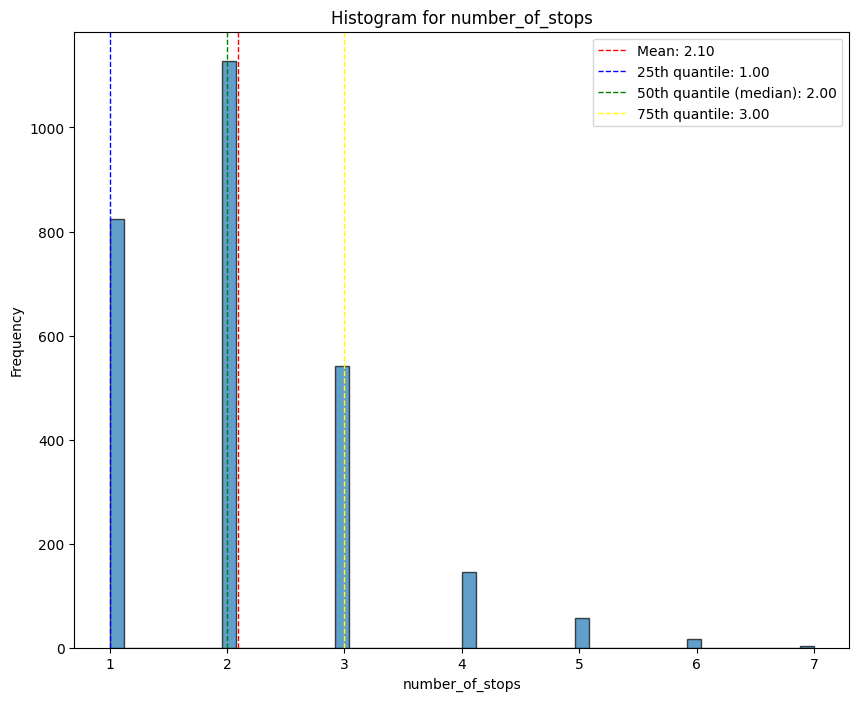

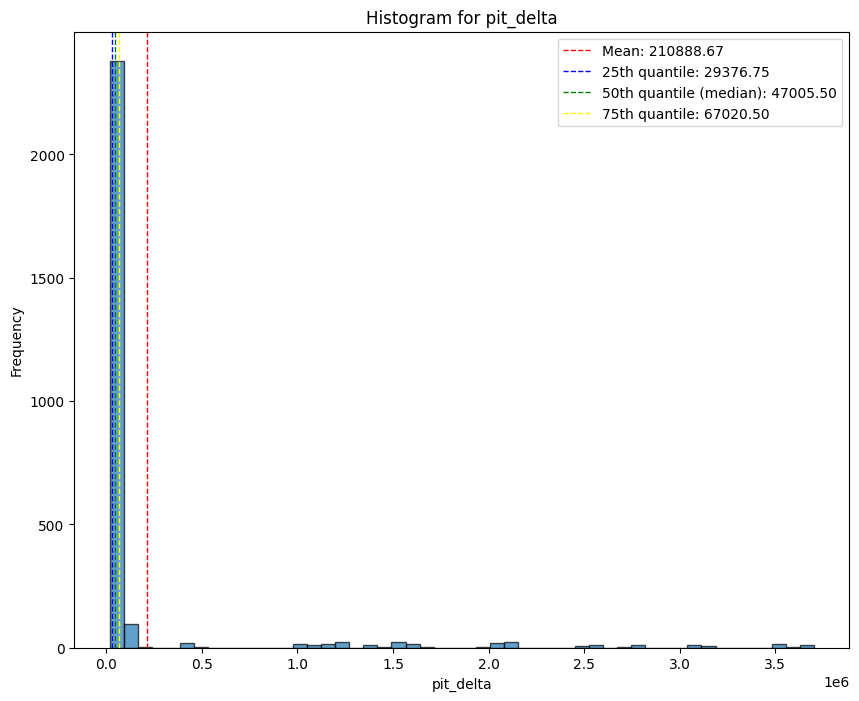

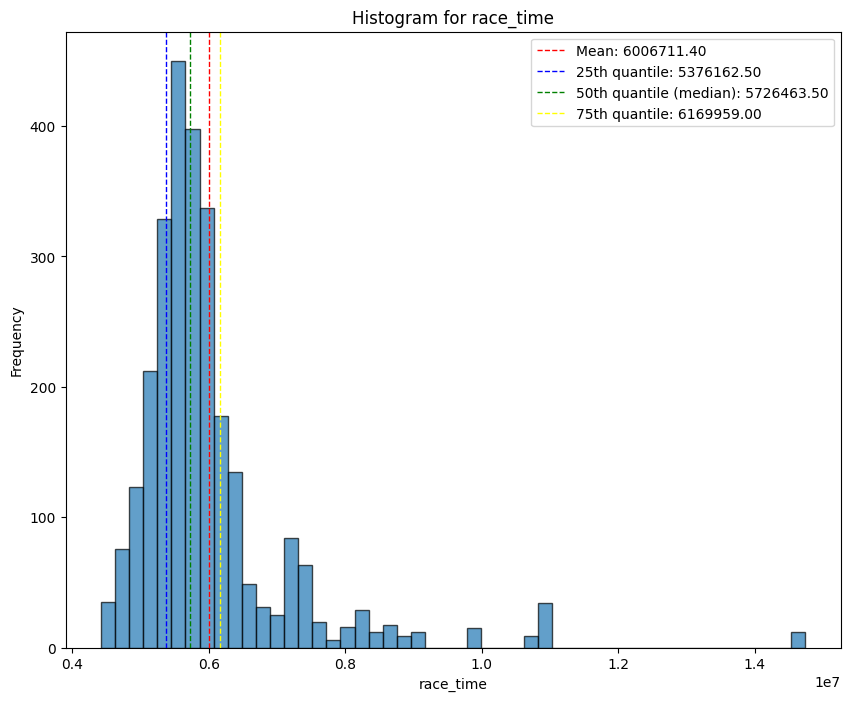

In [17]:
def plot_histograms(dataframe, exclude_columns=[]):
    """
    Plots histograms for columns in the provided dataframe, excluding specified columns.
    Includes lines for mean and quantiles.

    Args:
    - dataframe (pd.DataFrame): The dataframe containing the data.
    - exclude_columns (list): List of columns to exclude from plotting.

    Returns:
    - None
    """
    # Filter out the numerical columns and exclude specified columns
    num_columns = dataframe.select_dtypes(include=['float64', 'int64']).columns
    num_columns = [col for col in num_columns if col not in exclude_columns]

    # Plot histograms for each numerical column
    for column in num_columns:
        plt.figure(figsize = (10, 8))
        plt.hist(dataframe[column], bins = 50, edgecolor = 'black', alpha = 0.7)
        
        # Adding mean and quantiles
        mean_val = dataframe[column].mean()
        quantile_25 = dataframe[column].quantile(0.25)
        quantile_50 = dataframe[column].quantile(0.50)
        quantile_75 = dataframe[column].quantile(0.75)

        plt.axvline(mean_val, color='red', linestyle='dashed', 
        linewidth=1, label=f"Mean: {mean_val:.2f}")
        plt.axvline(quantile_25, color='blue', linestyle='dashed', 
        linewidth=1, label=f"25th quantile: {quantile_25:.2f}")
        plt.axvline(quantile_50, color='green', linestyle='dashed', 
        linewidth=1, label=f"50th quantile (median): {quantile_50:.2f}")
        plt.axvline(quantile_75, color='yellow', linestyle='dashed', 
        linewidth=1, label=f"75th quantile: {quantile_75:.2f}")

        plt.title(f'Histogram for {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.legend()
        plt.show()

# histograms for the dataset minus identifiers
plot_histograms(my_pit, exclude_columns=['raceId', 'driverId'])


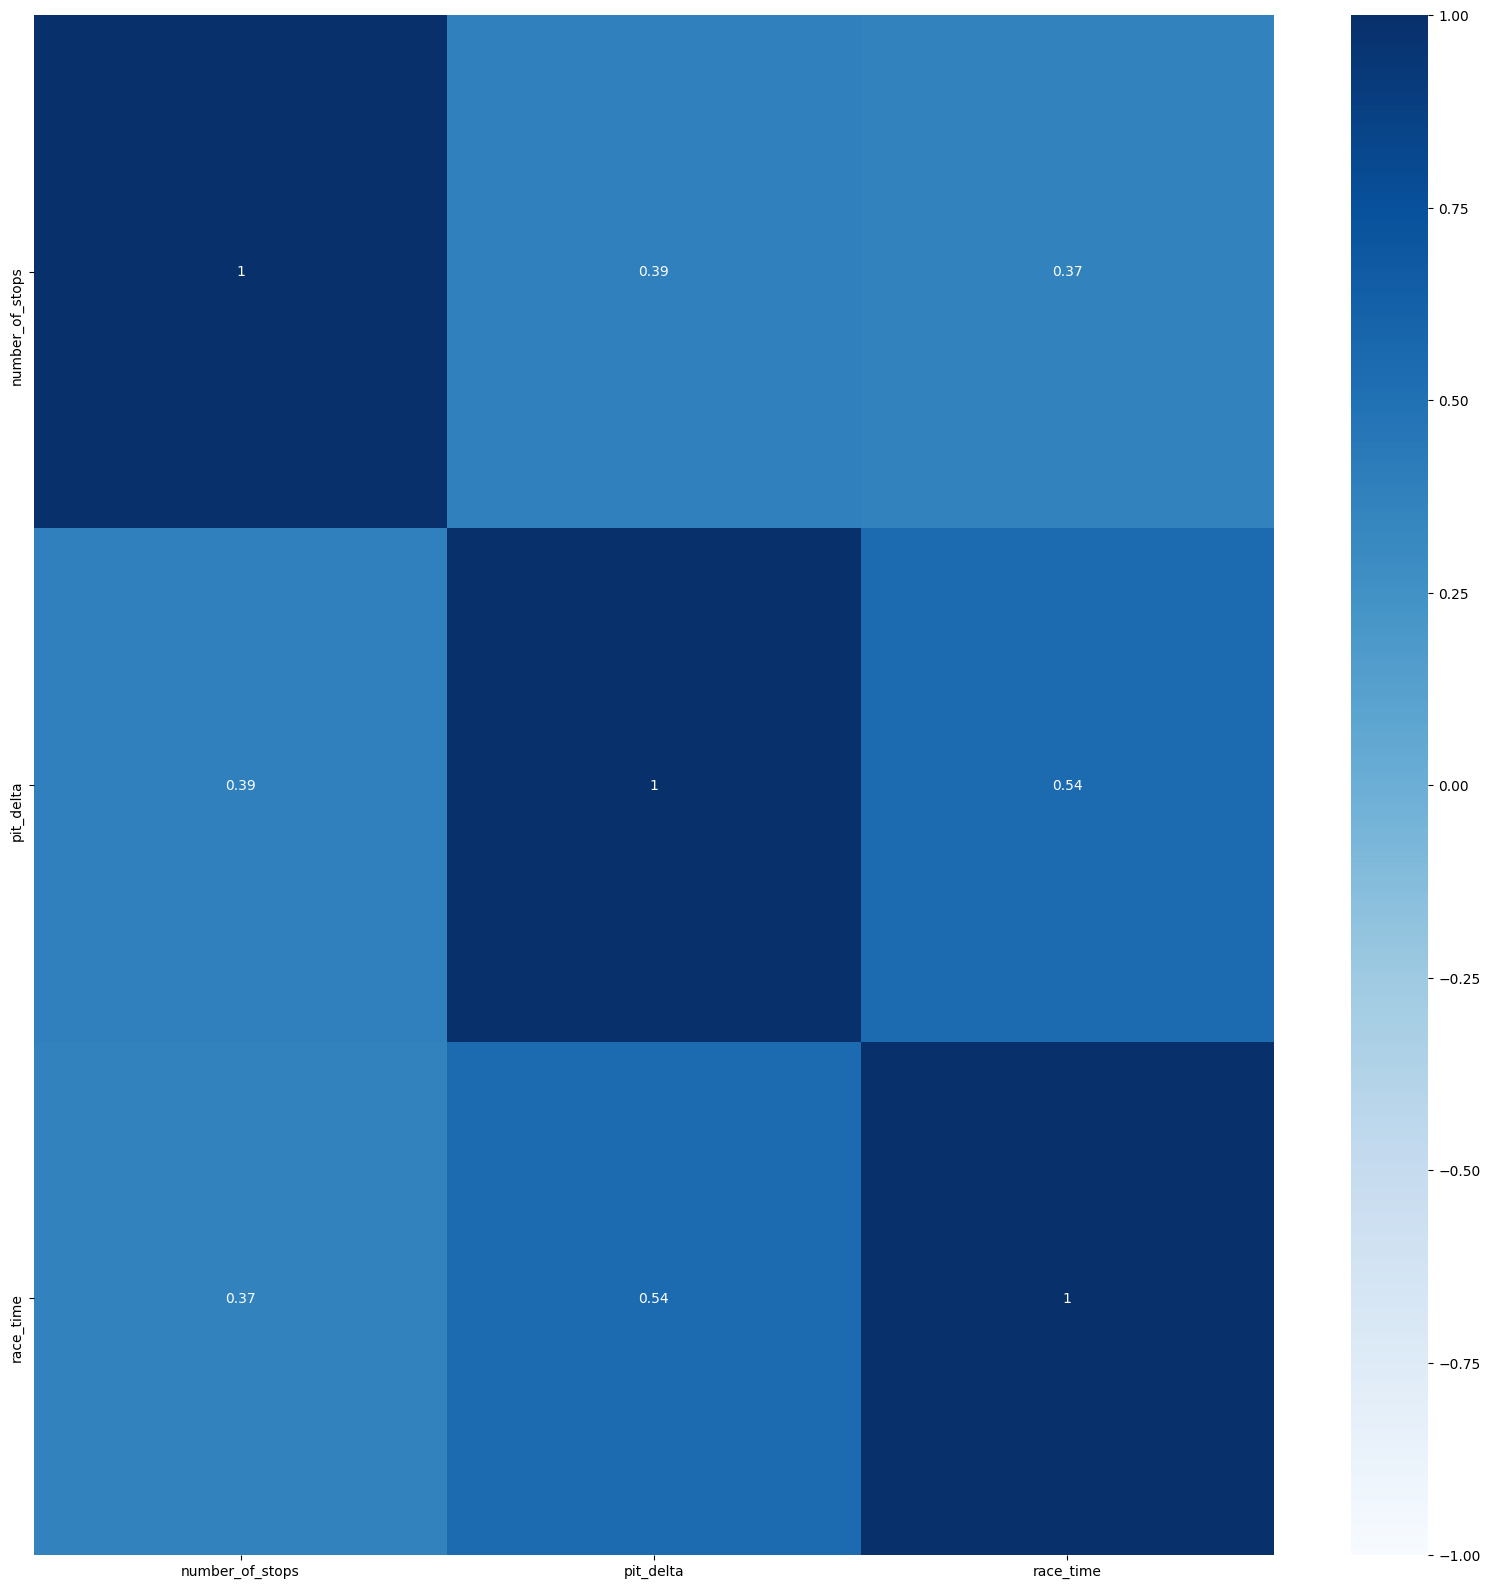

In [18]:
import seaborn as sns

my_col = ['number_of_stops', 'pit_delta', 'race_time']
correlation_matrix = my_pit[my_col].corr()

plt.figure(figsize=(20, 20))
sns.heatmap(correlation_matrix, annot = True, cmap = 'Blues', vmin = -1, vmax = 1) #tab20c
plt.show()

In [19]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np


X = my_pit[['number_of_stops']]  # Predictor variable
y = my_pit['race_time']  # Outcome variable

# Split data into training and testing sets
# Consider using LOO CV to test or evaluate performance
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Create the regression model
lr = LinearRegression()

# Fit the model to the training data
lr.fit(X_train, y_train)

# make predictions on the test data
y_pred = lr.predict(X_test)

# Create a summary DataFrame
summary_data = {
    'Coefficient': lr.coef_,
    'Intercept': lr.intercept_,
    'R-Squared': metrics.r2_score(y_test, y_pred),
    'Mean Absolute Error': metrics.mean_absolute_error(y_test, y_pred),
    'Mean Squared Error': metrics.mean_squared_error(y_test, y_pred),
    'Root Mean Squared Error': np.sqrt(metrics.mean_squared_error(y_test, y_pred))
}

summary_df = pd.DataFrame(summary_data)

# Transpose the DataFrame for a more familiar regression table layout
summary_df = summary_df.T

print(summary_df)

                                    0
Coefficient              4.421554e+05
Intercept                5.075687e+06
R-Squared                1.456267e-01
Mean Absolute Error      7.126925e+05
Mean Squared Error       1.277282e+12
Root Mean Squared Error  1.130169e+06


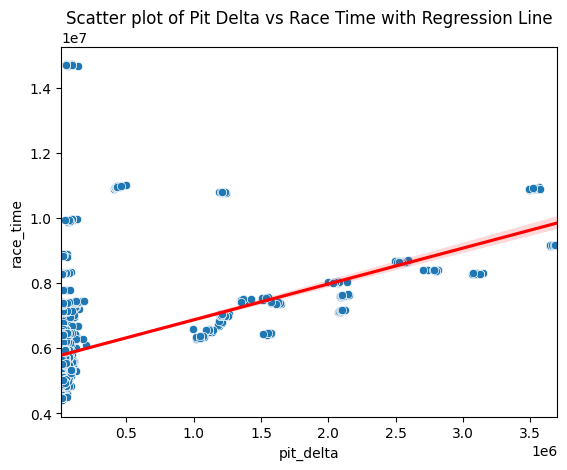

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# sho regression line
sns.scatterplot(x='pit_delta', y='race_time', data=my_pit)
sns.regplot(x='pit_delta', y='race_time', data=my_pit, scatter=False, color='red')
plt.title('Scatter plot of Pit Delta vs Race Time with Regression Line')
plt.show()


In [21]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('R^2:', r2)

Mean Absolute Error: 712692.479173893
R^2: 0.14562669570406162


In [22]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# Splitting the data into training and testing sets
X = my_pit[['number_of_stops', 'pit_delta']] 
y = my_pit['race_time']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


RMSE: 919527.550811
Relative Error (range): 0.0891
Relative Error (mean): 0.1531


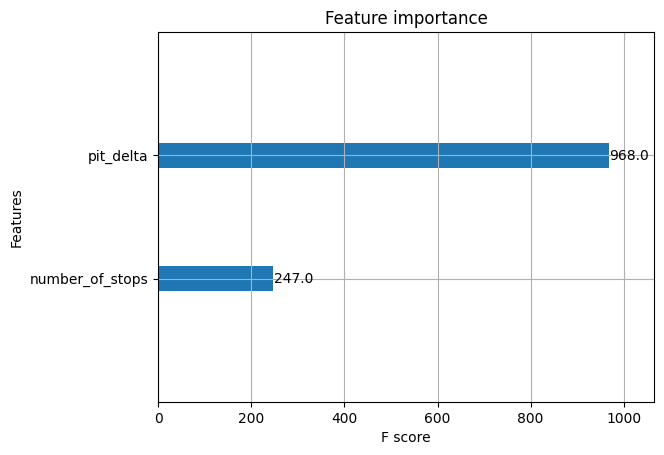

In [23]:

# Initialize the model
xgb_regressor = xgb.XGBRegressor(objective ='reg:squarederror', 
                                 colsample_bytree = 0.3, 
                                 learning_rate = 0.5,
                                 max_depth = 5, 
                                 alpha = 10, 
                                 n_estimators = 100)

# Fit the model
xgb_regressor.fit(X_train, y_train)

# Predict
y_pred = xgb_regressor.predict(X_test)

# Evaluate the model
rmse = mean_squared_error(y_test, y_pred, squared=False) # RMSE
print("RMSE: %f" % (rmse))

# Relative error with respect to the range
relative_error_range = rmse / (my_pit['race_time'].max() - my_pit['race_time'].min())

# Relative error with respect to the mean
relative_error_mean = rmse / my_pit['race_time'].mean()

print(f"Relative Error (range): {relative_error_range:.4f}")
print(f"Relative Error (mean): {relative_error_mean:.4f}")

# Visualize feature importance
import matplotlib.pyplot as plt

xgb.plot_importance(xgb_regressor)
plt.show()


In [24]:
from sklearn.metrics import mean_absolute_error, r2_score

mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print('Mean Absolute Error:', mae)
print('R^2:', r2) 

Mean Absolute Error: 508868.4632352941
R^2: 0.4344246400142251


In [25]:
## This killed the kernel and didn't work
#from sklearn.svm import SVR

#model = SVR(kernel = 'linear', C = 1e3, epsilon = 0.2)  # using linear kernel as an example
#model.fit(X_train, y_train)

# Predict on the test set
#y_pred = model.predict(X_test)

# Compute RMSE
#rmse = np.sqrt(mean_squared_error(y_test, y_pred))
#print('Root Mean Squared Error:', rmse)

# would it work if I applied a log transform to all my data and then did a linear regression? is this acceptable?

- Log - linear regression
- 

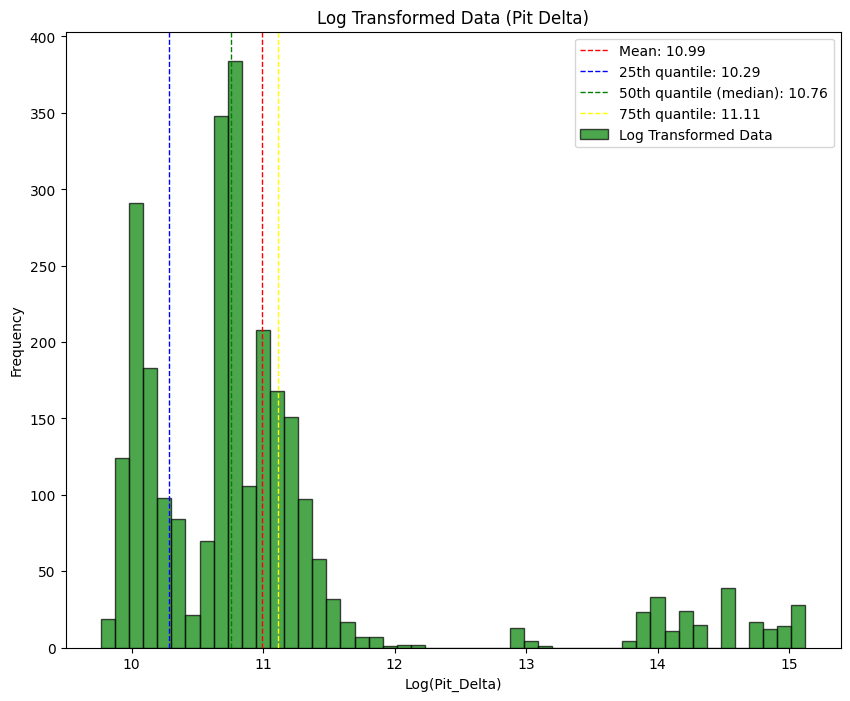

In [26]:
# Transform the pitstop data to view it better
# Apply a logarithmic transformation
log_transform = np.log1p(my_pit['pit_delta'])

# Adding mean and quantiles
mean_val = log_transform.mean()
quantile_25 = log_transform.quantile(0.25)
quantile_50 = log_transform.quantile(0.50)
quantile_75 = log_transform.quantile(0.75)

# Plot the transformed data
plt.figure(figsize=(10, 8))

plt.axvline(mean_val, color='red', linestyle='dashed', 
linewidth=1, label=f"Mean: {mean_val:.2f}")
plt.axvline(quantile_25, color='blue', linestyle='dashed', 
linewidth=1, label=f"25th quantile: {quantile_25:.2f}")
plt.axvline(quantile_50, color='green', linestyle='dashed', 
linewidth=1, label=f"50th quantile (median): {quantile_50:.2f}")
plt.axvline(quantile_75, color='yellow', linestyle='dashed', 
linewidth=1, label=f"75th quantile: {quantile_75:.2f}")

#plt.hist(my_pit['pit_delta'], label='Original Data')
plt.hist(log_transform, bins = 50, label='Log Transformed Data', color = 'green', edgecolor = 'black', alpha = 0.7)
plt.legend()
plt.title('Log Transformed Data (Pit Delta)')
plt.xlabel('Log(Pit_Delta)')
plt.ylabel('Frequency')
plt.show()


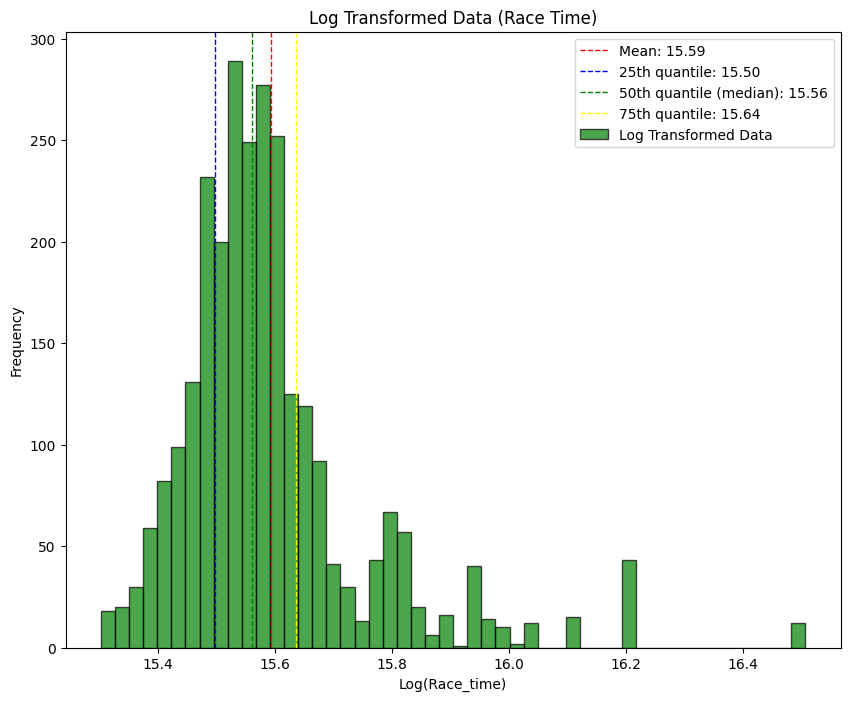

In [27]:
# Transform the pitstop data to view it better
# Apply a logarithmic transformation
log_transformed = np.log1p(my_pit['race_time'])

# Adding mean and quantiles
mean_val = log_transformed.mean()
quantile_25 = log_transformed.quantile(0.25)
quantile_50 = log_transformed.quantile(0.50)
quantile_75 = log_transformed.quantile(0.75)

# Plot the transformed data
plt.figure(figsize=(10, 8))

plt.axvline(mean_val, color='red', linestyle='dashed', 
linewidth=1, label=f"Mean: {mean_val:.2f}")
plt.axvline(quantile_25, color='blue', linestyle='dashed', 
linewidth=1, label=f"25th quantile: {quantile_25:.2f}")
plt.axvline(quantile_50, color='green', linestyle='dashed', 
linewidth=1, label=f"50th quantile (median): {quantile_50:.2f}")
plt.axvline(quantile_75, color='yellow', linestyle='dashed', 
linewidth=1, label=f"75th quantile: {quantile_75:.2f}")

plt.hist(log_transformed, bins = 50, label='Log Transformed Data', color = 'green', edgecolor = 'black', alpha = 0.7)
plt.legend()
plt.title('Log Transformed Data (Race Time)')
plt.xlabel('Log(Race_time)')
plt.ylabel('Frequency')
plt.show()


##  Trying out Log Linear Regression. 

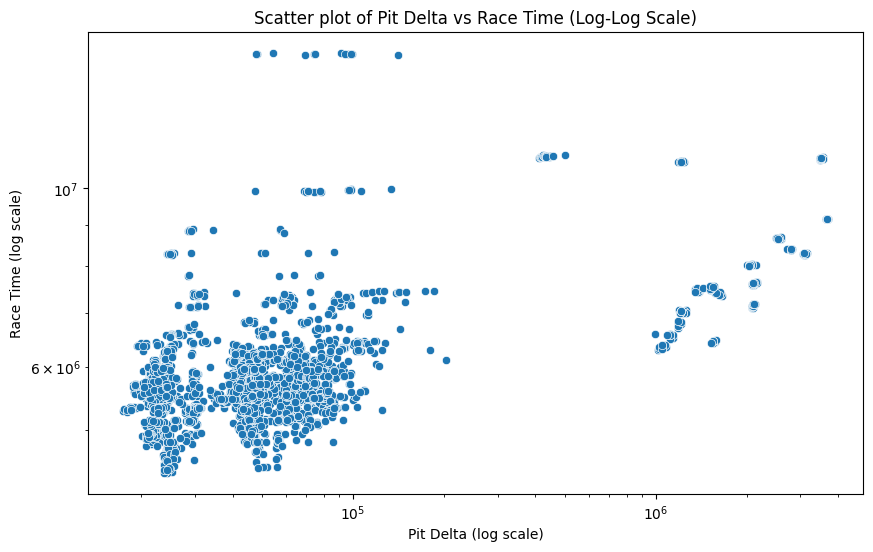

In [28]:
epsilon = 1e-5 # to ensure that none of the transformations are zero. Although highly unlikely

# Scatter plot on a log scale
plt.figure(figsize=(10, 6))
sns.scatterplot(x='pit_delta', y='race_time', data=my_pit + epsilon)
plt.xscale('log')
plt.yscale('log')
plt.title('Scatter plot of Pit Delta vs Race Time (Log-Log Scale)')
plt.xlabel('Pit Delta (log scale)')
plt.ylabel('Race Time (log scale)')
plt.show()


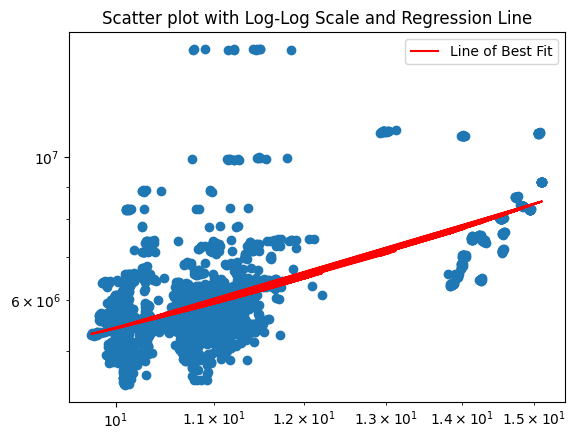

R^2: 0.3357083263385344


In [29]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Adding a small constant to avoid log(0)
epsilon = 1e-5

# Log-transforming the data
X_log = np.log(my_pit['pit_delta'] + epsilon).values.reshape(-1, 1)
y_log = np.log(my_pit['race_time'] + epsilon)

# Linear regression model
lr = LinearRegression()
lr.fit(X_log, y_log)

# Making predictions on the original scale 
my_pit['predicted_race_time'] = np.exp(lr.predict(X_log))

# Plotting
#sns.scatterplot(x='pit_delta', y='race_time', data=my_pit, color = 'blue', label = 'Original Datapoints')
#sns.scatterplot(x='pit_delta', y='predicted_race_time', data=my_pit, color='red', label = 'Predicted Data Points')
plt.scatter(X_log, my_pit['race_time'])
plt.plot(X_log, my_pit['predicted_race_time'], color='red', label='Line of Best Fit')
plt.xscale('log')
plt.yscale('log')
plt.title('Scatter plot with Log-Log Scale and Regression Line')
plt.legend()
plt.show()

# Calculating r^2
r2 = metrics.r2_score(my_pit['race_time'], my_pit['predicted_race_time'])

print('R^2:', r2)


In [30]:
len(my_pit['race_time'])

2716

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics


# Adding a small constant to avoid log(0)
epsilon = 1e-5


# Log-transforming the data
X_log = np.log(my_pit['pit_delta'] + epsilon).values.reshape(-1, 1)
y_log = np.log(my_pit['race_time'] + epsilon)


# Linear regression model
lr = LinearRegression()
lr.fit(X_log, y_log)

LinearRegression()

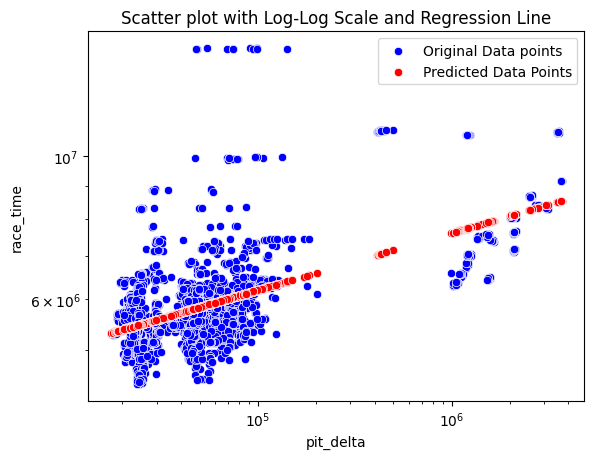

In [32]:
# Making predictions on the original scale
my_pit['predicted_race_time'] = np.exp(lr.predict(X_log))


# Plotting
sns.scatterplot(x='pit_delta', y='race_time', data=my_pit, color = 'blue', label = 'Original Data points')
sns.scatterplot(x='pit_delta', y='predicted_race_time', data=my_pit, color='red', label = 'Predicted Data Points')
plt.xscale('log')
plt.yscale('log')
plt.title('Scatter plot with Log-Log Scale and Regression Line')
plt.legend()
plt.show()


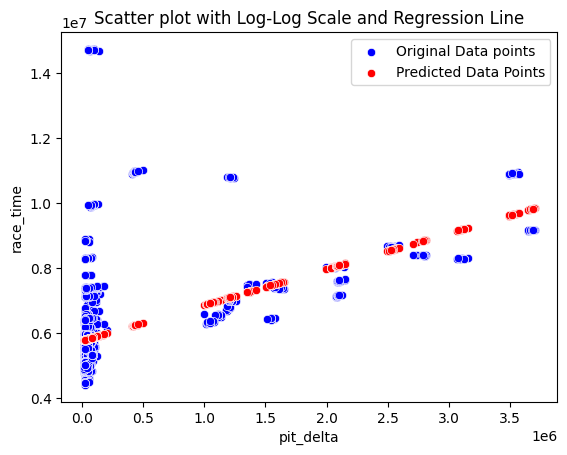

R^2: 0.29342501150267086


In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics

X = my_pit['pit_delta'].values.reshape(-1, 1)
y = my_pit['race_time'] 

# Linear regression model
lr = LinearRegression()
lr.fit(X, y)

# Making predictions on the original scale
my_pit['predicted_race_time'] = lr.predict(X)

# Plotting
sns.scatterplot(x='pit_delta', y='race_time', data=my_pit, color = 'blue', label = 'Original Data points')
sns.scatterplot(x='pit_delta', y='predicted_race_time', data=my_pit, color='red', label = 'Predicted Data Points')
plt.title('Scatter plot with Log-Log Scale and Regression Line')
plt.legend()
plt.show()

# Calculating r^2
r2 = metrics.r2_score(my_pit['race_time'], my_pit['predicted_race_time'])

print('R^2:', r2)

In [34]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Original data
X = my_pit['pit_delta'].values.reshape(-1, 1)
y = my_pit['race_time']

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

# Linear regression model
lr = LinearRegression()
lr.fit(X_train, y_train)

# Making predictions on the test set
y_test_pred = lr.predict(X_test)

# Adding predictions to the original dataframe for the test set
my_pit.loc[X_test.flatten() == my_pit['pit_delta'], 'predicted_race_time'] = y_test_pred

# Plotting
# Apply log transformation just for the visualization
plt.figure(figsize =(10, 6))
sns.scatterplot(x = np.log(my_pit['pit_delta']), y = np.log(my_pit['race_time']), color = 'blue', label = 'Actual')
sns.scatterplot(x = np.log(my_pit['pit_delta']), y = np.log(my_pit['predicted_race_time']), color = 'red', label = 'Predicted')
plt.xlabel('Log of Pit Delta')
plt.ylabel('Log of Race Time')
plt.title('Scatter plot with Log-Log Scale and Regression Line')
plt.legend()
plt.show()

# Calculating r^2 for the test set
r2_test = metrics.r2_score(y_test, y_test_pred)
print('Test R^2:', r2_test)


/var/folders/zj/rx7n4ybx1ml9886cdbwv429m0000gn/T/ipykernel_47353/899099474.py:23: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  my_pit.loc[X_test.flatten() == my_pit['pit_delta'], 'predicted_race_time'] = y_test_pred


ValueError: ('Lengths must match to compare', (2716,), (815,))

## Bayesian Statistics

In [ ]:
import pymc as pm
import arviz as az
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as sts
import pytensor.tensor as pt

WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


In [ ]:
# Linear Model with Student T likelihood
with pm.Model() as linear_model:
    # Priors
    a = pm.Uniform('a', lower = 0, upper = 100)
    b = pm.Normal('b', mu = 0, sigma = 10)
    nu = pm.HalfNormal('nu', sigma = 30)  # degrees of freedom for Student's T
    sigma = pm.Uniform('sigma', 0, 30)
    
    # Data
    x = pm.MutableData('x', my_pit['pit_delta'])
    y = pm.MutableData('y', my_pit['race_time'])

    # Regression Mean (Linear Function)
    mu = pm.Deterministic('mu', a + b * x)
    
    # Likelihood using Student's T
    pm.StudentT('likelihood', nu = nu, mu = mu, sigma = sigma, observed = y)
    
    # Sampling
    linear_trace = pm.sample(tune = 1000, draws = 1000, chains = 4)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [a, b, nu, sigma]
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.
WARNING (pytensor.tensor.blas): Using NumPy C-API based implementation for BLAS functions.


Sampling 4 chains for 1_000 tune and 1_000 draw iterations (4_000 + 4_000 draws total) took 546 seconds.
The rhat statistic is larger than 1.01 for some parameters. This indicates problems during sampling. See https://arxiv.org/abs/1903.08008 for details
The effective sample size per chain is smaller than 100 for some parameters.  A higher number is needed for reliable rhat and ess computation. See https://arxiv.org/abs/1903.08008 for details
Chain 2 reached the maximum tree depth. Increase `max_treedepth`, increase `target_accept` or reparameterize.


/Users/macbethmatibe/opt/anaconda3/lib/python3.8/site-packages/arviz/utils.py:184: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  numba_fn = numba.jit(**self.kwargs)(self.function)


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
a,49.187,28.913,0.028,94.118,1.074,0.760,601.0,452.0,1.01
b,4.533,0.701,3.602,5.419,0.349,0.267,5.0,29.0,2.97
nu,0.074,0.001,0.072,0.077,0.000,0.000,685.0,1351.0,1.01
sigma,29.847,0.143,29.582,30.000,0.004,0.003,941.0,930.0,1.00


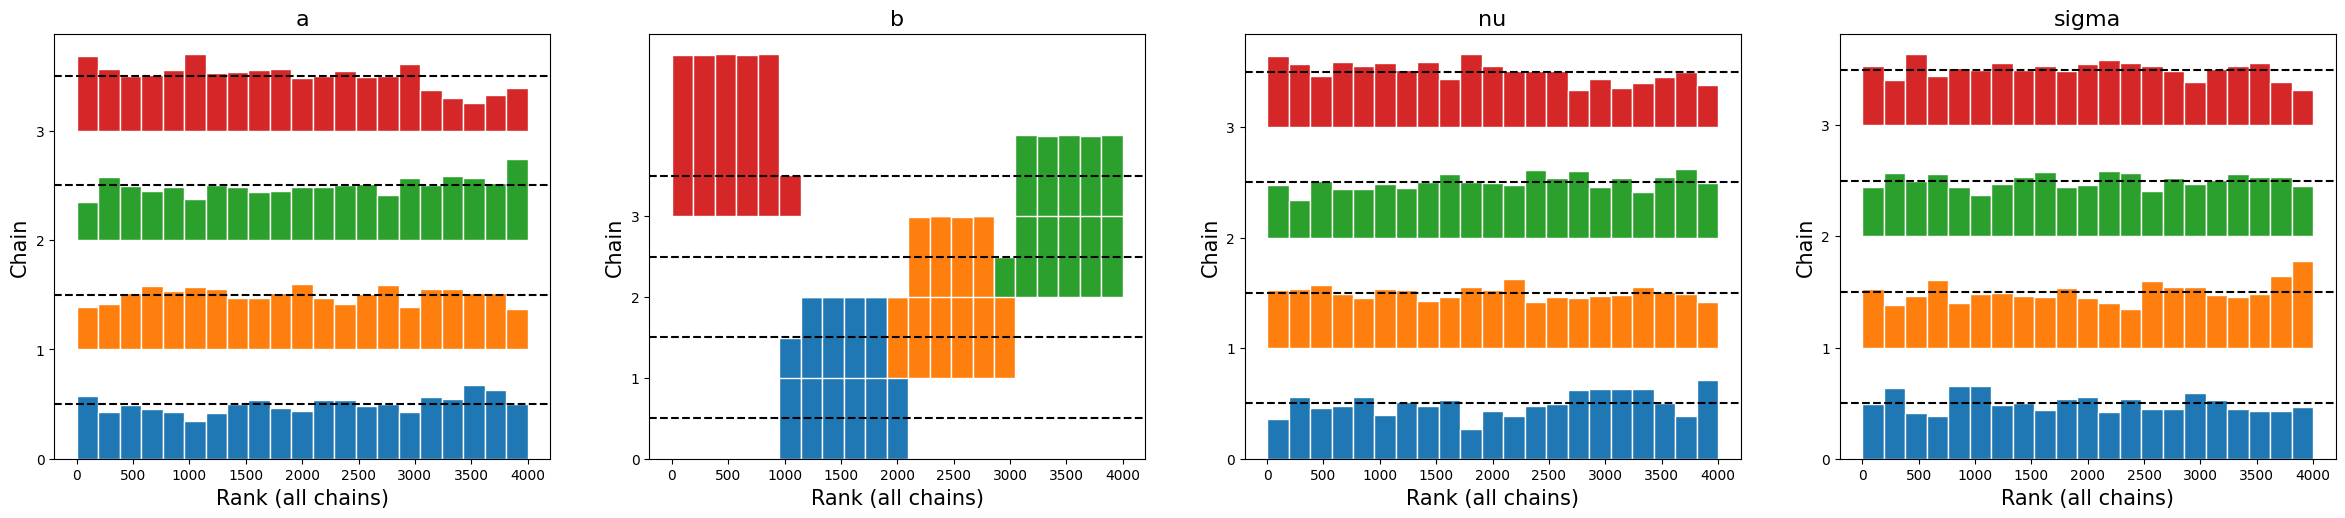

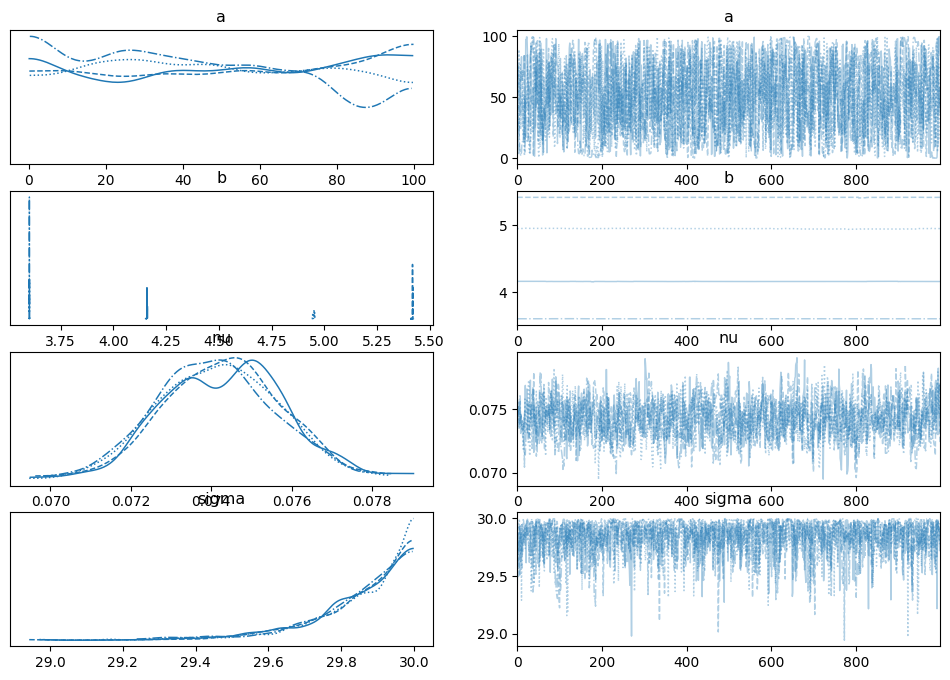

In [ ]:
az.plot_rank(linear_trace, var_names=['a', 'b', 'nu', 'sigma'])
az.plot_trace(linear_trace, var_names=['a', 'b', 'nu', 'sigma'])
az.summary(linear_trace, var_names=['a', 'b', 'nu', 'sigma'])

/Users/macbethmatibe/opt/anaconda3/lib/python3.8/site-packages/arviz/plots/hdiplot.py:156: FutureWarning: hdi currently interprets 2d data as (draw, shape) but this will change in a future release to (chain, draw) for coherence with other functions
  hdi_data = hdi(y, hdi_prob=hdi_prob, circular=circular, multimodal=False, **hdi_kwargs)


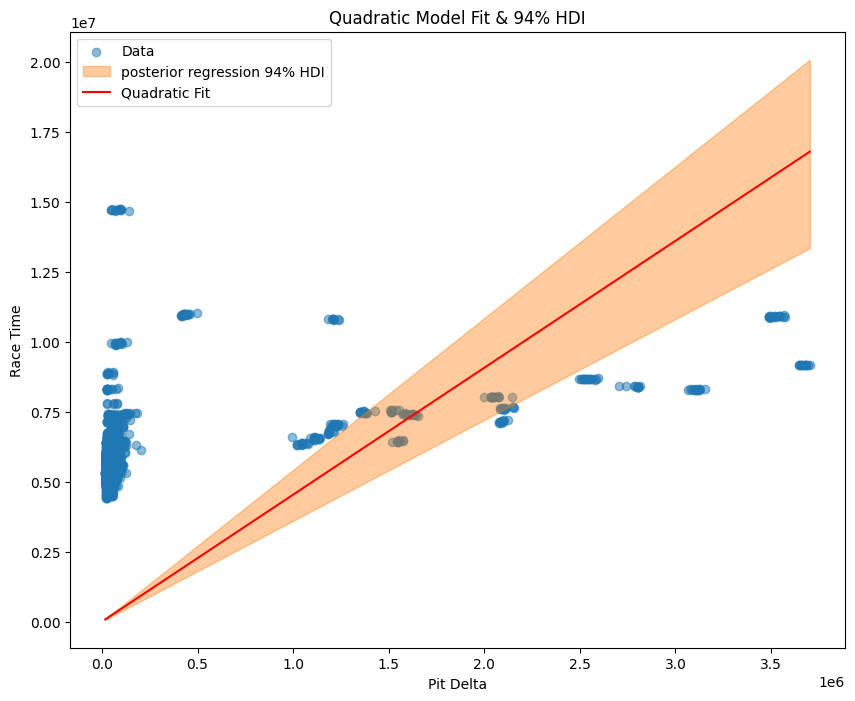

In [ ]:
# Computing mean values for the coefficients from the trace
a2_samples = linear_trace.posterior['a'].values.flatten()
b2_samples = linear_trace.posterior['b'].values.flatten()

a2_mean = a2_samples.mean()
b2_mean = b2_samples.mean()

# Generate predicted values using the mean parameter estimates
x_vals2 = np.linspace(min(my_pit['pit_delta']), 
                     max(my_pit['pit_delta']), 1000)
y_vals_q = a2_mean + b2_mean * x_vals2 

# Compute posterior distributions of the predictions
posterior_mu_q = (a2_samples[:, None] + b2_samples[:, None] * x_vals2)

# Plot the data with the line of best fit & HDI
plt.figure(figsize = (10, 8))
plt.scatter(my_pit['pit_delta'], 
            my_pit['race_time'], label = 'Data', alpha = 0.5)
ax = az.plot_hdi(x_vals2, posterior_mu_q, hdi_prob = 0.94, color = 'C1', 
                 fill_kwargs={'alpha': 0.4, 'label': 'posterior regression 94% HDI'})
plt.plot(x_vals2, y_vals_q, c = 'red', label = 'Quadratic Fit')
plt.title('Quadratic Model Fit & 94% HDI')
plt.xlabel('Pit Delta')
plt.ylabel('Race Time')
plt.legend()
plt.show()